In [50]:
import glob
import os
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import seaborn as sb
from braindecode.preprocessing import exponential_moving_standardize

In [5]:
DEFAULT_CHANNELS = [
    "Fp1", "Fp2",
    "F7", "F3", "Fz", "F4", "F8",
    "FT9", "FC5", "FC1", "FC2", "FC6", "FT10",
    "T7", "C3", "Cz", "C4", "T8",
    "CP5", "CP1", "CP2", "CP6",
    "P7", "P3", "Pz", "P4", "P8",
    "PO9", "O1", "Oz", "O2", "PO10",
]

In [86]:
begindu = list()
restdu = list()
for subject_dir in glob.glob("../data/vin/Official/*"):
    for sample_dir in glob.glob(f"{subject_dir}/sample*"):
        if not os.path.exists(f"{sample_dir}/EEG.edf"):
            continue
        
        raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=True, verbose=False)
        raw.set_montage("standard_1005")
        
        anno = pd.DataFrame(raw.annotations)
        begindu.append(anno[anno["description"] != "Resting"].iloc[0]["onset"])
        for _, r in anno[anno["description"] == "Resting"].iterrows():
            restdu.append(r["duration"])

/tmp/ipykernel_7532/3062941038.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=True, verbose=False)
/tmp/ipykernel_7532/3062941038.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=True, verbose=False)
/tmp/ipykernel_7532/3062941038.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=True, verbose=False)
/tmp/ipykernel_7532/3062941038.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=True, verbose=False)
/tmp/ipykernel_7532/3062941038.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(f"{sample_dir}/EEG.edf", preload=True, 

In [87]:
min(begindu), min(restdu)

(0.7098, 0.6287)

/home/txdat/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/txdat/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

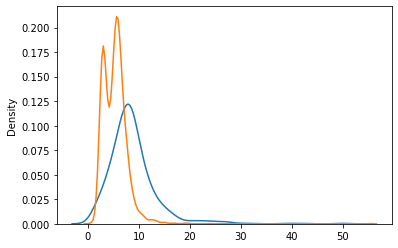

In [88]:
sb.distplot(begindu, hist=False)
sb.distplot(restdu, hist=False)

In [105]:
subject = "K309"
sample = 1

raw = mne.io.read_raw_edf(f"../data/vin/Official/{subject}/sample{sample}/EEG.edf", preload=True, verbose=False)
raw.set_montage("standard_1005")
raw.pick_channels(ch_names=DEFAULT_CHANNELS, ordered=True)

<RawEDF | EEG.edf, 32 x 16768 (131.0 s), ~4.1 MB, data loaded>

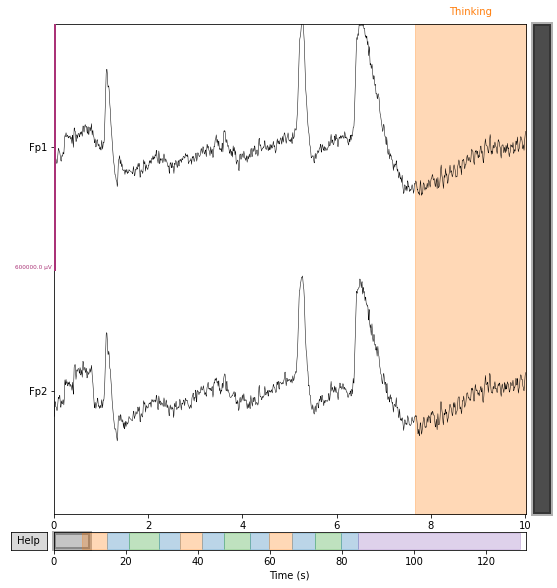

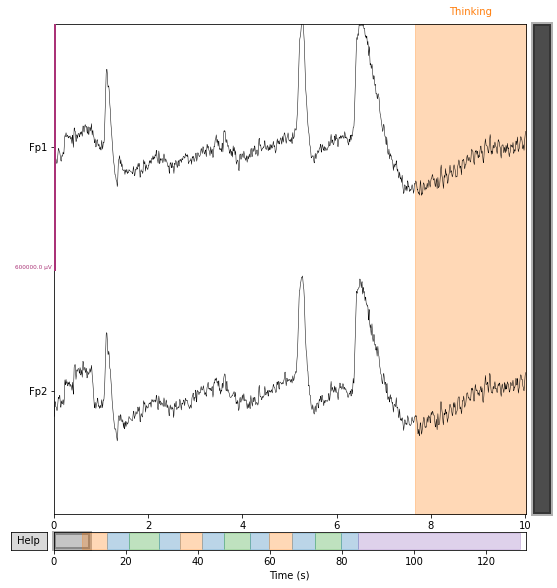

In [92]:
# raw.plot(scalings="auto")
raw.copy().pick(["Fp1", "Fp2"]).plot(scalings=0.3)

In [93]:
sraw = raw.copy()
sraw.apply_function(exponential_moving_standardize, channel_wise=False, factor_new=1e-3, init_block_size=None)

<RawEDF | EEG.edf, 32 x 16768 (131.0 s), ~4.1 MB, data loaded>

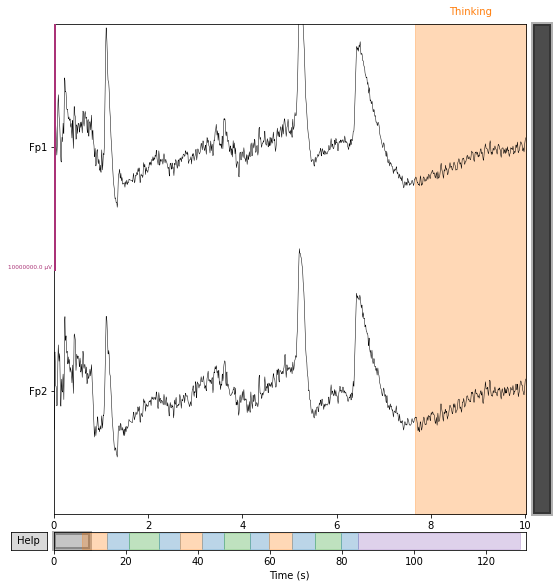

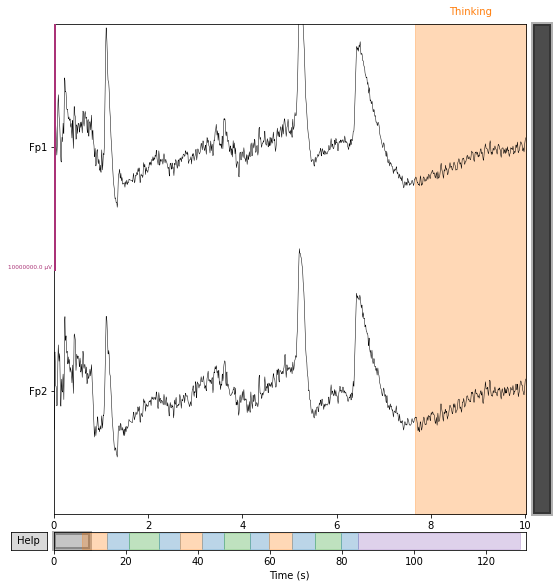

In [94]:
sraw.copy().pick(["Fp1", "Fp2"]).plot(scalings=5)

In [95]:
anno = pd.DataFrame(raw.annotations)
anno["offset"] = anno["onset"] + anno["duration"]
anno

,onset,duration,description,orig_time,offset
0,7.6669,7.0473,Thinking,2021-10-18 16:12:21+00:00,14.7142
1,14.7153,6.2803,Resting,2021-10-18 16:12:21+00:00,20.9956
2,20.9956,8.2471,Thinking and Acting,2021-10-18 16:12:21+00:00,29.2427
3,29.2437,5.7646,Resting,2021-10-18 16:12:21+00:00,35.0083
4,35.0082,6.1645,Thinking,2021-10-18 16:12:21+00:00,41.1727
5,41.1727,5.9817,Resting,2021-10-18 16:12:21+00:00,47.1544
6,47.1554,7.2455,Thinking and Acting,2021-10-18 16:12:21+00:00,54.4009
7,54.4019,5.3167,Resting,2021-10-18 16:12:21+00:00,59.7186
8,59.7186,6.3457,Thinking,2021-10-18 16:12:21+00:00,66.0643
9,66.0653,6.3800,Resting,2021-10-18 16:12:21+00:00,72.4453


In [96]:
anno[anno["description"] == "Thinking"]

,onset,duration,description,orig_time,offset
0,7.6669,7.0473,Thinking,2021-10-18 16:12:21+00:00,14.7142
4,35.0082,6.1645,Thinking,2021-10-18 16:12:21+00:00,41.1727
8,59.7186,6.3457,Thinking,2021-10-18 16:12:21+00:00,66.0643


In [97]:
anno[(anno["description"] == "Resting") & (anno.index < 4)]

,onset,duration,description,orig_time,offset
1,14.7153,6.2803,Resting,2021-10-18 16:12:21+00:00,20.9956
3,29.2437,5.7646,Resting,2021-10-18 16:12:21+00:00,35.0083


In [98]:
t = []
tmin = 0
tmax = 0
for i, r in anno[anno["description"] == "Thinking"].iterrows():
    if i > 0:
        tmax = r["onset"]
        t.append((tmin, tmax))
        
        # find previous resting
        tmin = anno[(anno["description"] == "Resting") & (anno.index < i)].iloc[-1]["onset"] + 0.01
        
tmax = anno[anno["description"] == "Typing"].iloc[0]["onset"]

t.append((tmin, tmax))

t

[(0, 35.0082), (29.253700000000002, 59.7186), (54.411899999999996, 84.3586)]

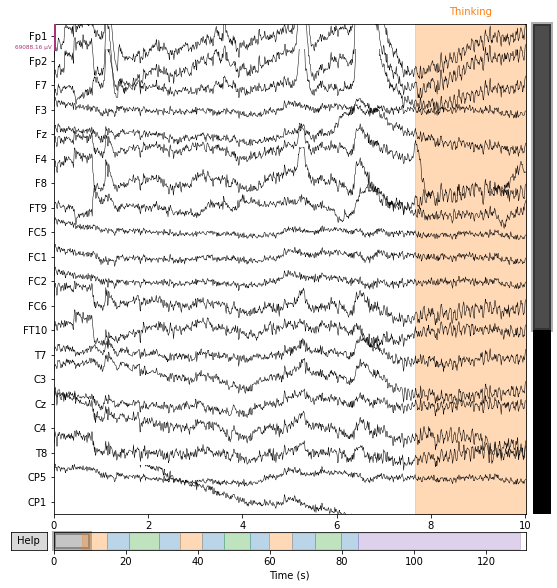

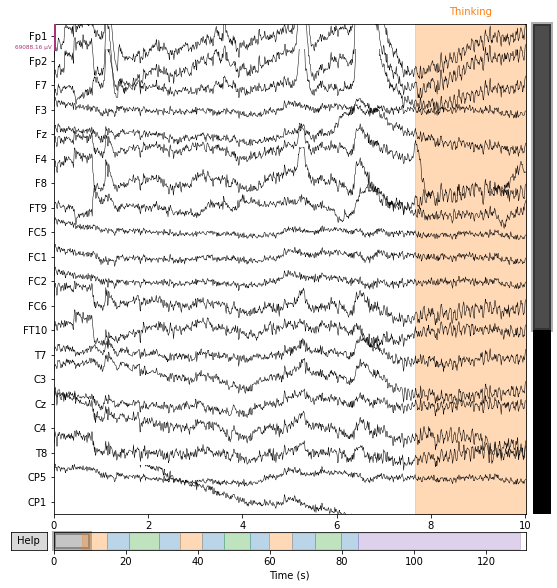

In [99]:
raw.plot(scalings="auto")

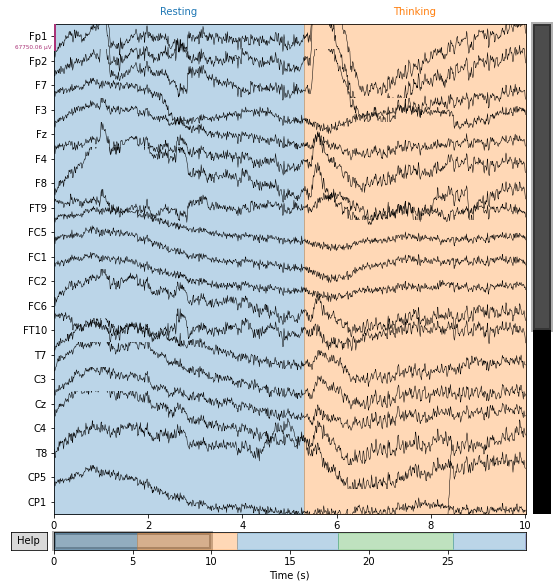

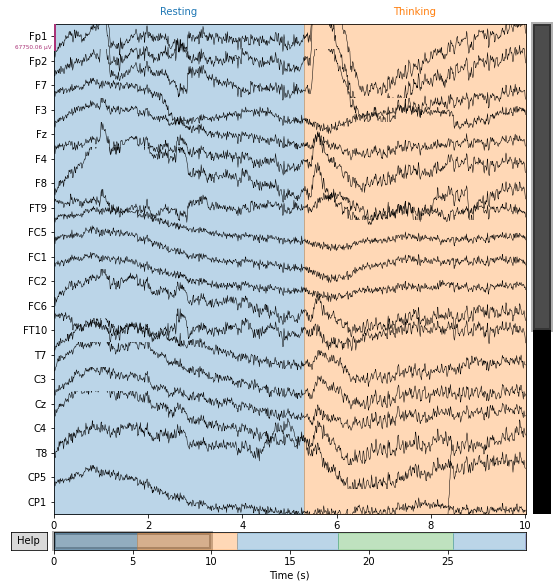

In [100]:
cropped = raw.copy().crop(tmin=t[2][0], tmax=t[2][1])

cropped.plot(scalings="auto")

In [101]:
pd.DataFrame(cropped.annotations)

,onset,duration,description,orig_time
0,54.414062,5.304538,Resting,2021-10-18 16:12:21+00:00
1,59.718600,6.345700,Thinking,2021-10-18 16:12:21+00:00
2,66.065300,6.380000,Resting,2021-10-18 16:12:21+00:00
3,72.446200,7.298200,Thinking and Acting,2021-10-18 16:12:21+00:00
4,79.744400,4.614200,Resting,2021-10-18 16:12:21+00:00
5,84.358600,0.008587,Typing,2021-10-18 16:12:21+00:00


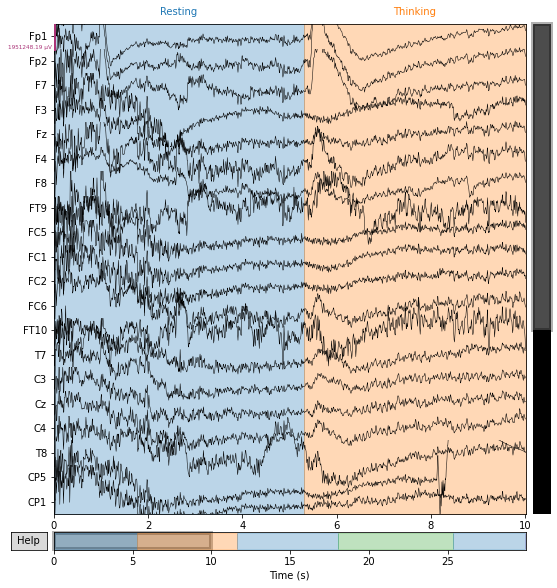

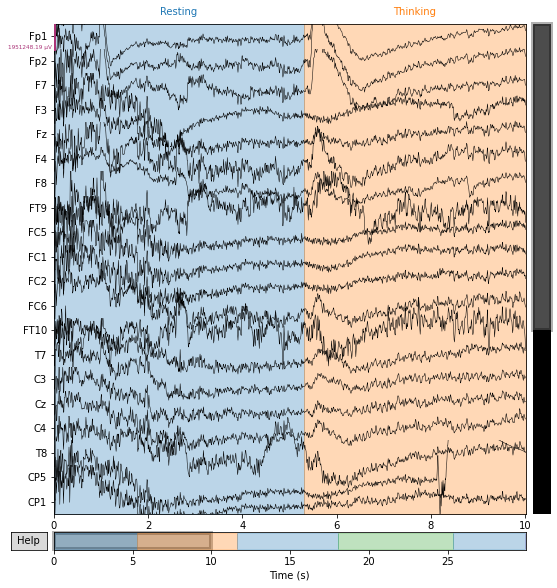

In [104]:
cropped.copy().apply_function(exponential_moving_standardize, channel_wise=False, factor_new=1e-3, init_block_size=None).plot(scalings="auto")